In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Multiclass Text Classification
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn import svm
from sklearn.svm import LinearSVC

# Naive Bayes Classifiers (Bernoulli and Multinomial)
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('/Users/omaral-shammary/Downloads/complaints.csv')

/var/folders/0s/58tfs8qd0znfdgvyk7n49gs00000gn/T/ipykernel_75325/3445353489.py:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/omaral-shammary/Downloads/complaints.csv')


In [3]:
len(df)

3056182

In [4]:
# Randomally selected 20,000 samples to test our model
df = df.sample(n=20000)
len(df)

20000

In [5]:
df.shape

(20000, 18)

In [6]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [7]:
col = ['Product', 'Consumer complaint narrative', 'ZIP code', 'Company', 'Company public response']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df = df[pd.notnull(df['Company public response'])]

In [8]:
df.columns=['Product', 'Consumer_complaint','Zip_code', 'Company', 'Public_Response']

In [9]:
# Allows us to categorize the type of complaint that consumers have submitted
df['category_id'] = df['Product'].factorize()[0]

In [10]:
# Drops any duplicate complaints from the same person, and allows us to sort the value
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')

In [11]:
category_to_id = dict(category_id_df.values)

In [12]:
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [13]:
df.head()

,Product,Consumer_complaint,Zip_code,Company,Public_Response,category_id
325875,"Credit reporting, credit repair services, or o...",Trans Union has deleted all my active accounts...,91403.0,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Company has responded to the consumer and the ...,0
1492721,"Credit reporting, credit repair services, or o...",An account is reporting to my credit profile t...,30013.0,Experian Information Solutions Inc.,Company has responded to the consumer and the ...,0
1763431,Vehicle loan or lease,Bridgecrest issued my car loan with a XXXX % A...,90606.0,Bridgecrest Acceptance Corporation,Company has responded to the consumer and the ...,1
3003577,"Credit reporting, credit repair services, or o...",I have hard inquiries on my credit report that...,77072,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Company has responded to the consumer and the ...,0
1414011,Credit card or prepaid card,Synchrony denied on-line credit for Care Credi...,07069,SYNCHRONY FINANCIAL,Company has responded to the consumer and the ...,2


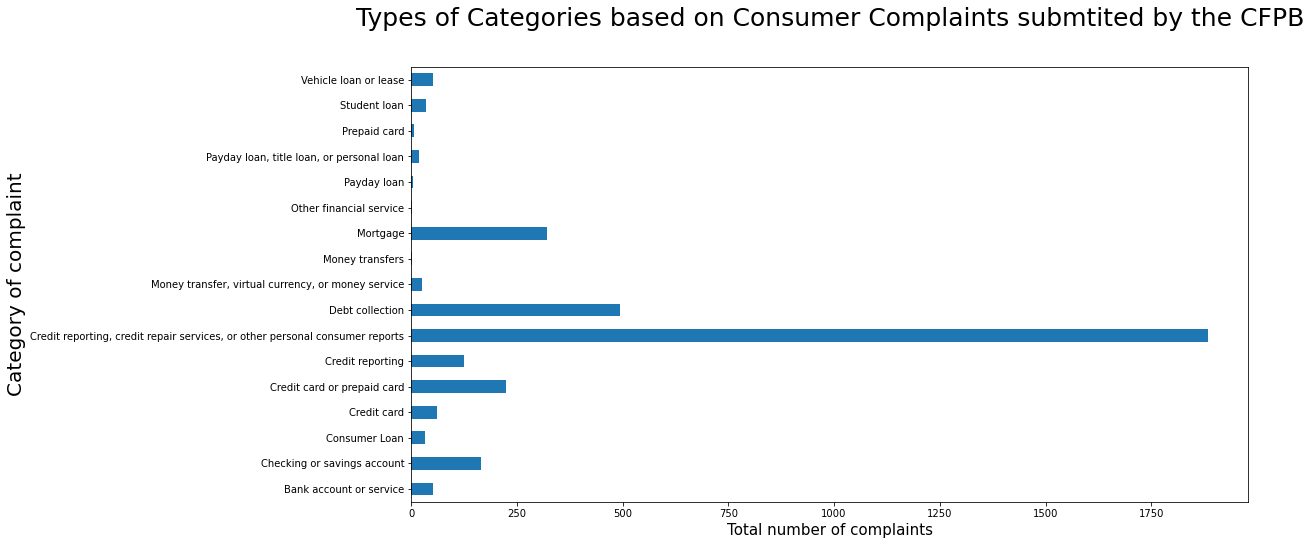

In [14]:
fig = plt.figure(figsize = (15,8))
df.groupby('Product').Consumer_complaint.count().plot.barh(ylim=0, align='center');
plt.title('Types of Categories based on Consumer Complaints submtited by the CFPB', size=25, y=1.08)
plt.xlabel('Total number of complaints', size=15)
plt.ylabel('Category of complaint', size=20, x=1.25)
plt.style.use('ggplot')

plt.show()

In [15]:
df.Company.value_counts()

TRANSUNION INTERMEDIATE HOLDINGS, INC.    909
Experian Information Solutions Inc.       869
CITIBANK, N.A.                            185
WELLS FARGO & COMPANY                     183
BANK OF AMERICA, NATIONAL ASSOCIATION     179
                                         ... 
IQOR US INC                                 1
Pacific Union Financial, LLC                1
CASH IN A FLASH INC                         1
STATE EMPLOYEES CREDIT UNION                1
Island Finance Puerto Rico                  1
Name: Company, Length: 341, dtype: int64

In [16]:
# te = df.groupby('Product').category_id.count()
# te[:8].plot.barh(ylim=0, align='center');

# SVC (A part of SVM)

In [17]:
tfidf = TfidfVectorizer(sublinear_tf=True,
                       min_df = 5,
                       norm ='l2',
                       ngram_range = (1,2),
                       stop_words = 'english')

In [18]:
features = tfidf.fit_transform(df.Consumer_complaint).toarray()

In [19]:
labels = df.category_id
features.shape

(3500, 9975)

In [20]:
df.columns

Index(['Product', 'Consumer_complaint', 'Zip_code', 'Company',
       'Public_Response', 'category_id'],
      dtype='object')

#### It is truly dependent on the complaint of the consumer, the company that is issuing the product, and the public response that the company issues toward the consumer.

In [108]:
# Including more variables alongside with it 
# X is Public Response, Y is Product
X_train, X_test, y_train, y_test = train_test_split(df['Public_Response'],
                            df['Product'], random_state= 0, test_size=0.20, train_size=0.80)

In [109]:
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [110]:
X_train_tfidf.shape

(2800, 56)

In [111]:
y_train.shape

(2800,)

In [56]:
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [57]:
print(clf.predict(count_vect.transform(['I have outdated information on my credit report'])))

['Debt collection']


In [38]:
print(clf.predict(count_vect.transform([''])))

['Debt collection']


In [58]:
y_pred = clf.predict(count_vect.transform(X_test))

A higher recall score is needed, as if there is fraduelent detection with one of these claims, it can be depicted as non-fradulent, which can be consequential for the financial institute. 

### Precision = how precise / accurate our model is when depicting which is what (Positive or Negative)
### Recall = How many of the actual positives our model captures is actually labeling it positive
### F1-score = A function of both Precision and Recall. It is valuable if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

In [59]:
print(metrics.classification_report(y_test,y_pred, labels=df['Product'], target_names=
                                   df['Product'].unique()))

                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.64      0.98      0.78       383
                                                       Vehicle loan or lease       0.64      0.98      0.78       383
                                                 Credit card or prepaid card       0.00      0.00      0.00        11
                                                             Debt collection       0.64      0.98      0.78       383
                                                                    Mortgage       0.00      0.00      0.00        39
                                                 Checking or savings account       0.48      0.43      0.45        89
                                                                 Credit card       0.64      0.98      0.78       383
                                                       

/Users/omaral-shammary/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2141: UserWarning: labels size, 3500, does not match size of target_names, 17
  warnings.warn(
/Users/omaral-shammary/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/omaral-shammary/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/omaral-shammary/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision

In [60]:
set(y_test) - set(y_pred)

{'Bank account or service',
 'Checking or savings account',
 'Consumer Loan',
 'Credit card',
 'Credit card or prepaid card',
 'Money transfer, virtual currency, or money service',
 'Payday loan',
 'Payday loan, title loan, or personal loan',
 'Prepaid card',
 'Student loan',
 'Vehicle loan or lease'}

In [61]:
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

0.6311612544381096

In [62]:
#from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# classifier = make_pipeline(StandardScaler(), LinearSVC())
# classifier.fit(X_train_tfidf, y_train)

# BernoulliNB (Naive Bayes Classifier)

In [121]:
clf2 = BernoulliNB().fit(X_train_tfidf, y_train)
print(clf2.predict(count_vect.transform(['I have outdated information on my credit report'])))

['Debt collection']


In [122]:
y_pred = clf2.predict(count_vect.transform(X_test))
print(metrics.classification_report(y_test,y_pred, labels=df['Product'], target_names=
                                   df['Product'].unique()))

                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.64      0.98      0.78       383
                                                       Vehicle loan or lease       0.64      0.98      0.78       383
                                                 Credit card or prepaid card       0.00      0.00      0.00        11
                                                             Debt collection       0.64      0.98      0.78       383
                                                                    Mortgage       0.00      0.00      0.00        39
                                                 Checking or savings account       0.54      0.08      0.14        89
                                                                 Credit card       0.64      0.98      0.78       383
                                                       

/Users/omaral-shammary/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2141: UserWarning: labels size, 3500, does not match size of target_names, 17
  warnings.warn(
/Users/omaral-shammary/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/omaral-shammary/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/omaral-shammary/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision

In [65]:
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

0.6307164260385107

# MultinomialNB 

In [123]:
clf3 = MultinomialNB().fit(X_train_tfidf, y_train)
print(clf3.predict(count_vect.transform(['I have outdated information on my credit report'])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [124]:
y_pred = clf3.predict(count_vect.transform(X_test))

In [125]:
print(metrics.classification_report(y_test,y_pred, labels=df.Product, target_names=
                                   df['Product'].unique()))

                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.61      0.98      0.75       383
                                                       Vehicle loan or lease       0.61      0.98      0.75       383
                                                 Credit card or prepaid card       0.00      0.00      0.00        11
                                                             Debt collection       0.61      0.98      0.75       383
                                                                    Mortgage       0.00      0.00      0.00        39
                                                 Checking or savings account       0.48      0.43      0.45        89
                                                                 Credit card       0.61      0.98      0.75       383
                                                       

/Users/omaral-shammary/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2141: UserWarning: labels size, 3500, does not match size of target_names, 17
  warnings.warn(
/Users/omaral-shammary/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/omaral-shammary/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/omaral-shammary/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision

In [69]:
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

0.6117956077495925

# Truncated SVD  (aka LSA)

Rather than converting a sparse matrix to dense (which is discouraged), I would use scikits-learn's TruncatedSVD, which is a PCA-like dimmensionality reduction algorithm (using by default Randomized SVD) which works on sparse data:

In particular, truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as latent semantic analysis (LSA)

In [3]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

In [4]:
svd = TruncatedSVD(n_components=5, n_iter = 7, random_state=42)
clf4 = svd.fit_transform(X_train_tfidf,y_train)

NameError: name 'X_train_tfidf' is not defined

In [1]:
print(clf4.predict(count_vect.transform(['I have outdated information on my credit report'])))

NameError: name 'clf4' is not defined

In [114]:
print(svd.explained_variance_ratio_)

[0.42609049 0.34181134 0.08553899 0.05653773 0.03128392]


In [115]:
print(svd.explained_variance_ratio_.sum())

0.9412624685996154


In [116]:
print(svd.singular_values_)

[48.36165193 16.90824909  8.01451776  6.59363693  4.84907565]


In [105]:
print(clf4.predict(count_vect.transform(['I have outdated information on my credit report'])))

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [90]:
#classifier.fit(X_train_tfidf, y_train)

In [ ]:
#clf3 = MultinomialNB().fit(X_train_tfidf, y_train)
#print(clf3.predict(count_vect.transform(['I have outdated information on my credit report'])))

In [75]:
X_train_tfidf.shape

(2800, 56)

In [76]:
y_train.shape

(2800,)

In [ ]:
svd = TruncatedSVD(n_components=5, random_state=42)
data = svd.fit_transform(data) 